<br>

<h1>
    <center>
        Estimating $\pi$ using Various Methods
    </center>
</h1>

---

<br>

<h3>
    <center>
        By:
    </center>   
    <br>
        <center>
            Nipunjeet Singh Gujral
        </center>    
    </br>
</h3>

## Table of Contents


0. [Defining Problem](#0.-Defining-Problem)
1. [Import Libraries](#1.-Import-Libraries)
2. [Estimate $\pi$ using Taylor Series Expansion (TCE) ](#2.-Estimate-$\pi$-using-Taylor-Series-Expansion) 
    * 2.1 Define Functions
        * GenerateTaylorSeries
    * 2.2 Perform Computations
    * 2.3 Construct Records DataFrame
3. [Estimate $\pi$ using Monte Carlo Simulation with Numpy (NumpyMC)](#3.-Estimate-$\pi$-using-Monte-Carlo-Simulation-with-Numpy)
    * 3.1 Perform Numpy Computations
    * 3.2 Construct Records DataFrame
4. [Estimate $\pi$ using Quantum Monte Carlo Simulation (QCMC)](#4.-Estimate-$\pi$-using-Quantum-Monte-Carlo-Simulation) 
    * 4.1 Define Functions
        * CreateCircuit
        * GenerateRandomNumbers_QC
        * NormalizeNumbers
    * 4.2 Perform Computations
    * 4.3 Construct Performance DataFrame
5. [Analysis of Performance](#5.-Analysis-of-Performance)
    * 5.1 Construct $\pi$ Approximation Performance DataFrame
    * 5.2 Save Performance DataFrame as csv
    * 5.3 Plot Sample Size vs. $\pi$ Approximation
    * 5.4 Plot Sample Size vs. $\pi$ Approximation Error
    * 5.5 Plot Computational Time vs. $\pi$ Approximation Error
    * 5.6 Plot  $\pi$ Approximation Error vs. $Log_{10}$(Population)
    * 5.7 Measure Corrilation between $\pi$ Approximation Error and Sample Size
6. [Conclusion - Which is better?](#6.-Conclusion)

7. [Visualize Approximation of $\pi$](#7.-Visualize-Approximation-of-$\pi$)
    * 7.1 Talor Series Approximation of $\pi$
    * 7.2 Monte Carlo Approximation of $\pi$

### 0. Defining Problem

<br>

<p>The famously irrational number $\pi$ in a number than can be conceptuialized by humans and used regularly in computations by simpily using symbology as means of representing all the copmlexity imbune with $\pi$. But for a computer, such an irrational number can provide to be difficult due to limitation in memory and the utlization of the Base-2 (binary) number system. We as humans have therefore devised methods of approximating $\pi$ using computational method dependent on iterative estimations that provide a closer approximation to true $\pi$. The following code will use various methods to approximate $\pi$ and include analysis on which method provides that most accruate and speedy approximatation of $\pi$. 
</p>

Regarding the methods used to estimate $\pi$, I chose to use the Talor Series Expansion (TSE) method and two variations of Monte Carlo Simulation (MCS) methods to test which method more accurately and rapidly approximates $\pi$ as listed below:

<br>

#### Approximating $\pi$ via the Taylor Series Expansion:

$$\pi = 4 \sum_{i=1}^{n} \frac{(-1)^{n}}{2n-1}$$

$$ \pi = 4 \left( 1 - \frac{1}{3} + \frac{1}{5} - \frac{1}{7} + \frac{1}{9} ... \frac{1}{n} \right) = 3.1415926...$$

<br>

#### Aproximating $\pi$ via Monte Carlo Simulation:


![MC_Simulation](./Monte_Carlo_Approximation.gif)


<br>

However two variations of MCS are used; one method involving the traditional _Numpy_ library from which so much of Python is based on, and the other involves the use of **IBM's Quantum Computing** simulator via the _Qiskit_ library. Implicitly the MCS method of approximting $\pi$ relies on the utilization of random numbers and is therefore best suited for the application of a Quantum Computer, as such machines are fickle to say the least. The errant and unreliable nature of the current iterations of quantum computers provides a degree of randomness that would be best suited in this application as it might accelerate the approximation of $\pi$ by using fewer iterations to produces a reasonable answer.

<br>

#### Test and Evaluation:

Testing and evaluating the aforementioned algorithms require the use of large populations within whihc iterative computations can take-place. This below code uses test populations of $10^{2}, 10^{3}, 10^{4}, 10^{5}, 10^{6}, 10^{7}$ and $10^{8}$ to test the accuracy and speed of the algorithms at large scale and to illustrate any asymptotic behaviors.

### 1. Import Libraries

In [1]:
# import visulaization tool
import seaborn as sns
import matplotlib.pyplot as plt

# import numerical processing tool
import numpy as np
np.random.seed(1234)

# import quantum simulation tools
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import BasicAer, execute
import pylatexenc

# data handeling
import pandas as pd

# measure time/duration 
import time

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

### 2. Estimate $\pi$ using Taylor Series Expansion

$$\pi = 4 \sum_{i=1}^{n} \frac{(-1)^{n}}{2n-1} = 4  \left( 1 - \frac{1}{3} + \frac{1}{5} - \frac{1}{7} + \frac{1}{9} ... \frac{1}{n }\right)$$


#### 2.1 Define Functions - GenerateTaylorSeries

In [2]:
def GenerateTaylorSeries(x):
    """
    Input:
        x | int | numebr of iterations to approximate taylor series expansion pi/4
    Output:
        pi_aproximation | float | approximation of pi        
    """
        
    iteration_value = [(1**(2*i+1)*(-1)**i)/(2*i+1) for i in np.arange(x)]
    summation = np.sum(iteration_value)
    pi_approximation = 4 * summation
        
    return pi_approximation

#### 2.2 Perform Computations


In [3]:
# establish lists to hold recorded values
pi_approximation_list = []
population_list = []
duration = [] 

for sample_size in [int(1e2), int(1e3), int(1e4), int(1e5), int(1e6), int(1e7), int(1e8)]:

    print(f'{sample_size}')
        
    # measure start time
    start = time.time()   
    
    # generate taylor series
    pi_approximation = GenerateTaylorSeries(x = sample_size)
    
    # measure stop time
    stop = time.time()
    
    # record keeping
    duration.append(stop-start)        
    pi_approximation_list.append(pi_approximation)
    population_list.append(sample_size)
    

100
1000
10000
100000
1000000
10000000
100000000


#### 2.3 Construct Records DataFrame

In [4]:
TaylorSeries_Performance = (
    pd.DataFrame(
        data = list(zip(pi_approximation_list, population_list, duration)),
        columns = ['pi_approximatation', 'population', 'duration']
    )
    .assign(        
        error = lambda x: x['pi_approximatation'] - np.pi
    )   
)

display(TaylorSeries_Performance)

,pi_approximatation,population,duration,error
0,3.131593,100,0.000000,-9.999750e-03
1,3.140593,1000,0.000000,-9.999998e-04
2,3.141493,10000,0.000000,-1.000000e-04
3,3.141583,100000,0.096159,-1.000000e-05
4,3.141592,1000000,0.857165,-1.000000e-06
5,3.141593,10000000,20.396902,-1.000000e-07
6,3.141593,100000000,226.092866,-9.999976e-09


### 3. Estimate $\pi$ using Monte Carlo Simulation with Numpy

#### 3.1 Perform Numpy Computations

In [5]:
# establish lists to hold recorded values
pi_approximation_list = []
population_list = []
duration = [] 

for sample_size in [int(1e2), int(1e3), int(1e4), int(1e5), int(1e6), int(1e7), int(1e8)]:
    
    print(f'{sample_size}')
    
    # measure start time
    start = time.time()   
    
    # generate x values
    x = np.random.random_sample(sample_size)
    # generate y values
    y = np.random.random_sample(sample_size)
    
    # create MC 
    mc_values = np.sqrt(np.square(x) + np.square(y))
    pi_approximation = 4*len(mc_values[mc_values <= 1]) / len(x)
    
    # measure stop time
    stop = time.time()
    
    # record keeping
    duration.append(stop-start)        
    pi_approximation_list.append(pi_approximation)
    population_list.append(sample_size)

100
1000
10000
100000
1000000
10000000
100000000


#### 3.2 Construct Records DataFrame

In [6]:
Numpy_Performance = (
    pd.DataFrame(
        data = list(zip(pi_approximation_list, population_list, duration)),
        columns = ['pi_approximatation', 'population', 'duration']
    )
    .assign(        
        error = lambda x: x['pi_approximatation'] - np.pi
    )   
)

display(Numpy_Performance)

,pi_approximatation,population,duration,error
0,3.120000,100,0.000000,-0.021593
1,3.088000,1000,0.000000,-0.053593
2,3.132400,10000,0.000000,-0.009193
3,3.145800,100000,0.016584,0.004207
4,3.140820,1000000,0.047542,-0.000773
5,3.141036,10000000,0.603526,-0.000556
6,3.141538,100000000,6.115496,-0.000054


### 4. Estimate $\pi$ using Quantum Monte Carlo Simulation


<br>

The following code uses an 8-bit Qunautm Computing system to generate binary associted with number rangeing from $[-127, 128]$ for use later in Monte Carlo Simulation. As previously stated, the introduction of random variation induced from a quntuam comptuer may improve the speed and accuracy assocaited with approximating $\pi$. The Monte Carlo simulation performed using Numpy however requires numbers between $[0,1]$ and will therefore require the QCMC algorithm to undergo an additional step of normalizing values to be within the required range to be tested on an apples-to-apples basis against the Numpy variation. For the puposes of evaluting the speed however, the QCMC algorithm will only judged on by the speed required to to construct the aforementioned 8-bit numbers.

<br>

Below is an image of the Quantum Computing Circuit used to generate the numbers, each _Q-bit_ has a single Hadamar Gate applied to it prior to the final Measurement stage for the sake of simplicity:

<br> 

![Q-Circuit](./Quantum_Circuit_8_bit.png)

#### 4.1 Define Functions - CreateCircuit

In [7]:
def CreateCircuit(bits):
    """
    Input:
        bits | int | defines how many q-bits the circuit involves
    Output:
        circuit | qiskit.circuit | establish a circuit to randomly generate 8-bit binary numbers
        circuit_diagram | matplotlib.figure | figure that depicts the q-bit to c-bit figure
    """    
    
    # define quantum register | classical register
    q = QuantumRegister(bits);  c = ClassicalRegister(bits)
    
    # define circuit
    circuit = QuantumCircuit(q, c)
    
    # use for loops to add q-bits and hadamar gates to the existing circuit
    for j in range(bits): circuit.h(q[j])
    
    # add measurements to transfer from q-bit to classical-bit
    circuit.measure(q, c)
    
    # draw circuit
    circuit_drawing = circuit.draw(output='mpl')
    
    # return circuit and drawing
    #return (circuit, circuit_drawing)
    return circuit

#### 4.1 Define Functions - GenerateRandomNumbers_QC

In [8]:
def GenerateRandomNumbers_QC(circuit, sample_size):
    """
    Input:
        circuit | qiskit.circuit | establish a circuit to randomly generate 8-bit binary numbers
        sample_size | int | number of iterations to generate 8-bit numbers
    Output:
        numbers | list(int) | list of binary numbers generated by the circuit
    """   
    
    # generate binary numbers
    binary_numbers = execute(
        experiments = circuit,
        backend = BasicAer.get_backend('qasm_simulator'),
        shots = sample_size,
        memory = True
    )
    
    # convert binary numbers to integers
    numbers = np.array([int(i, 2) for i in binary_numbers.result().get_memory()])
    
    return numbers

#### 4.1 Define Functions - NormalizeNumbers

In [9]:
def NormalizeNumbers(numbers):
    """
    Input:
        numbers | list(int) | list of binary numbers generated by the circuit
    Output:
        normalized_values | list(float) | list of normalized numbers between [0,1]
    """
    minimum = min(numbers)
    maximum = max(numbers)
    
    normalized_values = np.array([(num - maximum) / (maximum - minimum) for num in numbers])
    
    return normalized_values

#### 4.2 Perform Computations

In [10]:
# establish circute
bits = 8
circuit = CreateCircuit(bits = bits)

# establish lists to hold recorded values
pi_approximation_list = []
population_list = []
duration = [] 

# perform iterations    
for sample_size in [int(1e2), int(1e3), int(1e4), int(1e5), int(1e6), int(1e7), int(1e8)]:

    print(sample_size)
        
    # measure start time
    start = time.time()   
    
    # generate x values
    x = NormalizeNumbers(GenerateRandomNumbers_QC(circuit = circuit, sample_size = sample_size))
    # generate y values
    y = NormalizeNumbers(GenerateRandomNumbers_QC(circuit = circuit, sample_size = sample_size))
    
    # create MC
    mc_values = np.sqrt(np.square(x) + np.square(y))
    pi_approximation = 4*len(mc_values[mc_values <= 1]) / len(x)
    
    # measure stop time
    stop = time.time()
    
    # record keeping
    duration.append(stop-start)        
    pi_approximation_list.append(pi_approximation)
    population_list.append(sample_size)

100
1000
10000
100000
1000000
10000000
100000000


#### 4.3 Construct Records DataFrame

In [11]:
QuantumComputing_Performance = (
    pd.DataFrame(
        data = list(zip(pi_approximation_list, population_list, duration)),
        columns = ['pi_approximatation', 'population', 'duration']
    )
    .assign(        
        error = lambda x: x['pi_approximatation'] - np.pi
    )   
)

display(QuantumComputing_Performance)

,pi_approximatation,population,duration,error
0,3.000000,100,0.521808,-0.141593
1,3.136000,1000,0.063453,-0.005593
2,3.158800,10000,0.468687,0.017207
3,3.132480,100000,3.735700,-0.009113
4,3.131304,1000000,37.922909,-0.010289
5,3.132830,10000000,377.214584,-0.008763
6,3.132364,100000000,3815.337664,-0.009229


### 5. Analysis of Performance

#### 5.1 Construct $\pi$ Approximation Performance DataFrame

In [12]:
TaylorSeries_Performance = TaylorSeries_Performance.assign(method = 'TaylorSeries')
Numpy_Performance = Numpy_Performance.assign(method = 'NumpyMC')
QuantumComputing_Performance = QuantumComputing_Performance.assign(method = 'QCMC')

Performance_DataFrame = (
    pd.concat(
        [TaylorSeries_Performance, Numpy_Performance, QuantumComputing_Performance]
    )
    [['method', 'population', 'duration', 'pi_approximatation', 'error']]
)

####  5.2 Save Performance DataFrame as csv

In [13]:
Performance_DataFrame.to_csv("./Pi_Approximation_Performance_Record.csv", index = False)

#### 5.3 Plot Sample Size vs. $\pi$ Approximation

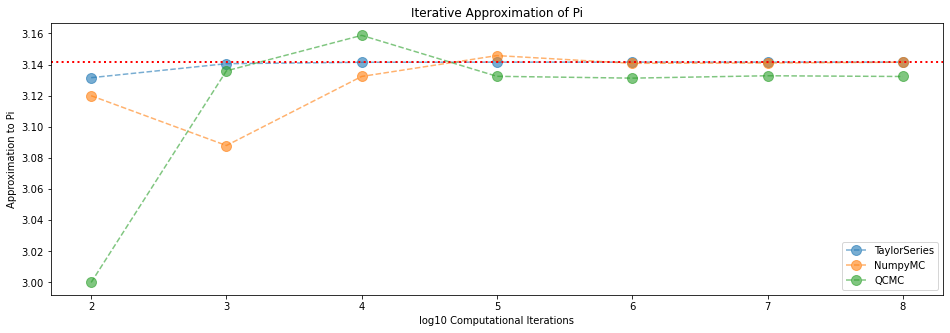

In [14]:
fig, ax0 = plt.subplots()

for algorithm in ['TaylorSeries', 'NumpyMC', 'QCMC']:
    (
        Performance_DataFrame
        .query(f"method == '{algorithm}'")
        .assign(log_pop = lambda x: np.log10(x['population']))
        .plot(
            x = 'log_pop',
            y = 'pi_approximatation',
            ax = ax0,
            alpha = 0.6,
            style = "o--",            
            markersize = 10,            
            xlabel = "log10 Computational Iterations",
            ylabel = "Approximation to Pi",
            title = "Iterative Approximation of Pi",
            figsize = (16, 5),
        )
    )
    
ax0.legend(['TaylorSeries', 'NumpyMC', 'QCMC'])
plt.axhline(
    y = np.pi,
    xmin = 0, xmax = Performance_DataFrame.population.max(),
    color = 'red',
    linewidth = 2,
    linestyle = 'dotted'
)

#### 5.4 Plot $log_{10}$(Durations) vs. $\pi$ Approximation Error

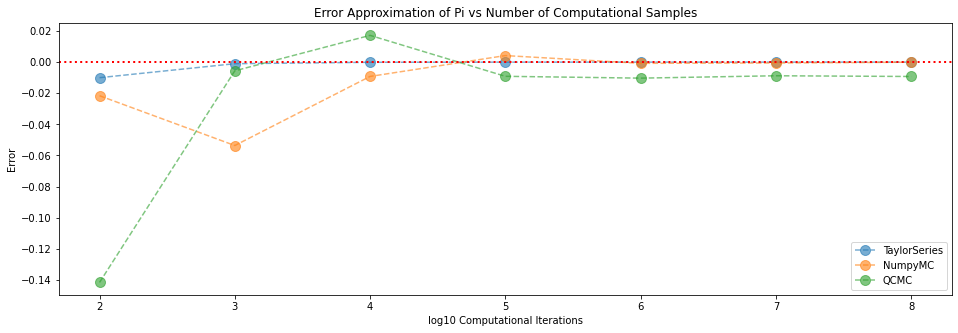

In [15]:
fig, ax0 = plt.subplots()

for algorithm in ['TaylorSeries', 'NumpyMC', 'QCMC']:
    (
        Performance_DataFrame
        .query(f"method == '{algorithm}'")
        .assign(log_pop = lambda x: np.log10(x['population']))
        .plot(
            x = 'log_pop',
            y = 'error',
            ax = ax0,
            alpha = 0.6,
            style = "o--",
            markersize = 10,            
            xlabel = "log10 Computational Iterations",
            ylabel = "Error",
            title = "Error Approximation of Pi vs Number of Computational Samples",
            figsize = (16, 5),
        )
    )
    
ax0.legend(['TaylorSeries', 'NumpyMC', 'QCMC'])
plt.axhline(
    y = 0,
    xmin = 0, xmax = Performance_DataFrame.population.max(),
    color = 'red',
    linewidth = 2,
    linestyle = 'dotted'
)

#### 5.5 Plot $log_{10}$(Durations) vs. $\pi$ Approximation Error

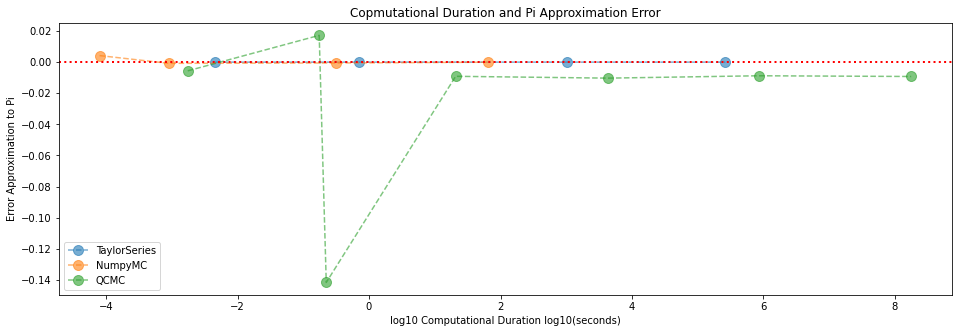

In [16]:
fig, ax0 = plt.subplots()

for algorithm in ['TaylorSeries', 'NumpyMC', 'QCMC']:
    (
        Performance_DataFrame
        .query(f"method == '{algorithm}'")
        .assign(
            log_pop = lambda x: np.log10(x['population']),
            log_duration = lambda x: np.log(x['duration'])
        )
        .sort_values('log_duration')
        .plot(
            x = 'log_duration',
            y = 'error',
            ax = ax0,
            alpha = 0.6,
            style = "o--",            
            markersize = 10,
            xlabel = "log10 Computational Duration log10(seconds)",
            ylabel = "Error Approximation to Pi",
            title = "Copmutational Duration and Pi Approximation Error",
            figsize = (16, 5),
        )
    )
    
ax0.legend(['TaylorSeries', 'NumpyMC', 'QCMC'])
plt.axhline(
    y = 0,
    xmin = 0, xmax = Performance_DataFrame.population.max(),
    color = 'red',
    linewidth = 2,
    linestyle = 'dotted'
)

#### 5.6 Plot  $\pi$ Approximation Error vs. $Log_{10}$(Population)

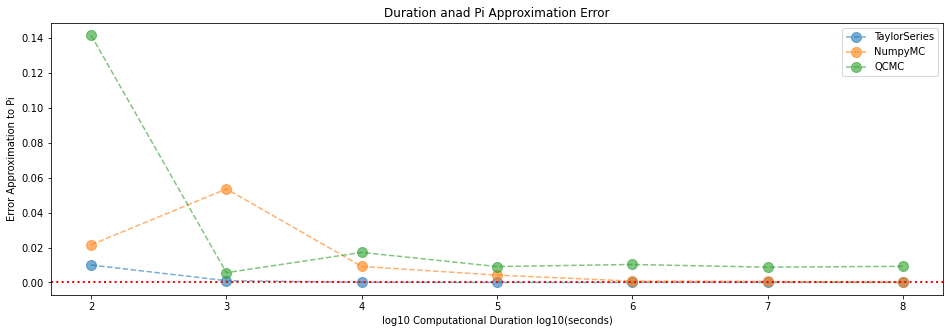

In [17]:
fig, ax0 = plt.subplots()

for algorithm in ['TaylorSeries', 'NumpyMC', 'QCMC']:
    (
        Performance_DataFrame
        .query(f"method == '{algorithm}'")
        .assign(
            log_pop = lambda x: np.log10(x['population']),
            log_duration = lambda x: np.log(x['duration']),
            abs_error = lambda x: abs(x['error'])
        )
        .sort_values('log_pop')
        .plot(
            x = 'log_pop',
            y = 'abs_error',
            ax = ax0,
            alpha = 0.6,
            style = "o--",            
            markersize = 10,
            xlabel = "log10 Computational Duration log10(seconds)",
            ylabel = "Error Approximation to Pi",
            title = "Duration anad Pi Approximation Error",
            figsize = (16, 5),
        )
    )
    
ax0.legend(['TaylorSeries', 'NumpyMC', 'QCMC'])
plt.axhline(
    y = 0,
    xmin = 0, xmax = Performance_DataFrame.population.max(),
    color = 'red',
    linewidth = 2,
    linestyle = 'dotted'
)

#### 5.7 Measure Corrilation between Pi Approximation Error and Sample Size

In [18]:
for algorithm in ['TaylorSeries', 'NumpyMC', 'QCMC']:
    display(
        f"Algorithm: {algorithm}",
        (
            Performance_DataFrame
            .query(
                f"method == '{algorithm}'"
            )
            .assign(
                log_pop = lambda x: np.log10(x['population']),
                log_duration = lambda x: np.log(x['duration']),
                abs_error = lambda x: abs(x['error'])
            )        
            [['population', 'abs_error']]
            .corr()
        )
    )

'Algorithm: TaylorSeries'

,population,abs_error
population,1.000000,-0.211531
abs_error,-0.211531,1.000000


'Algorithm: NumpyMC'

,population,abs_error
population,1.000000,-0.324342
abs_error,-0.324342,1.000000


'Algorithm: QCMC'

,population,abs_error
population,1.000000,-0.195622
abs_error,-0.195622,1.000000


### 6. Conclusion

<br>

#### Bottom Line Up Front (BLUF):

Ranking the various algorithms by speed and accuracy:

| Rank | Algorithm    |
|------|--------------|
| 1    | TaylorSeries |
| 2    | NumpyMC      |
| 3    | QCMC         |

<br>

#### Analysis:

The series method of approxiamting $\pi$ only requires one algorithmicaly generated list with which to perform computations. In constrast each of the _Monte Carlo Approximation_ methods requires two of the aforementioned algorithmically generated lists and should therefore be expected, and proven, to be less effecient that the aformentioned _Taylor Series Expansion_ method. Between the two varieties of the Monte Carlo Approximation method, the Numpy method performed faster and more accurately for population sizes greater than $10^{3}$ as compared to the Quantum Computing method. Incidently the corrilation between population size and absolute value of the approximated value of $\pi$ error are indeed negtively corrilated with various degrees of strength listed below:

<br>

| Method       | Corrilation |
|--------------|-------------|
| TaylorSeries | -0.211531   |
| NumpyMC      | -0.324324   |
| QCMC         | -0.195622   | 

<br>

Although weakly corrilated the NumpyMC algorithm is almost twices a negatively corrilated as the QCMC algorithm futher providign evidence to the notation that the NumpyMC algorithm is faster and more accruate the the QCMC algorithm. In terms of approximation, the Taylor Series has an asymptotically oscillating and decreasing margin of error per iterations as larger populations are used to approximate a solutions. In constrast the Monte Carlo method has a monotonically decreassing error as populations increase with the rate of decrease being faster with the Numpy variation than with the Quantum Computing variation. Illustrations of the various methods can be seen in the next section.  

### 7. Visualize Approximation of $\pi$

#### 7.1 Talor Series Approximation of $\pi$

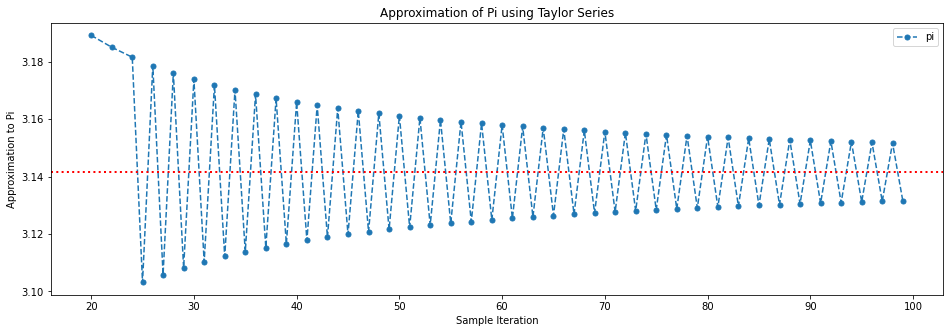

In [19]:
sample_size = int(1e2)

(
    pd.DataFrame(
        data = list(zip(
            range(sample_size),           
        )),
        columns = ['sample']        
    )
    .assign(
        approximation = lambda x: (1**(2*x['sample']+1)*(-1)**x['sample'])/(2*x['sample']+1),
        pi = lambda x: abs(4*np.cumsum(x['approximation']))
    )
    .query("pi > 3.1 and pi < 3.19")
    .plot(
        x = 'sample',
        y = 'pi',   
        style = "o--",            
        markersize = 5,
        xlabel = "Sample Iteration",
        ylabel = "Approximation to Pi",
        title = "Approximation of Pi using Taylor Series",
        figsize = (16, 5),
    )
)


plt.axhline(
    y = np.pi,
    xmin = 0, xmax = sample_size,
    color = 'red',
    linewidth = 2,
    linestyle = 'dotted'
)

#### 7.2 Monte Carlo Approximation of $\pi$

In [20]:
def ConditionallyColor(x):
    """
    Input:
        x | list(float) | monte carlo simulation values
    Output:
        color | str | color associated with monte carlo visualization
    """
    
    if abs(x) <= 1:
        color = 'blue'
    else:
        color = 'red'
        
    return color

<AxesSubplot:title={'center':'Approximating Pi using Monte Carlo Approximation \nn = 100000 | pi = 3.13236408'}, xlabel='X', ylabel='Y'>

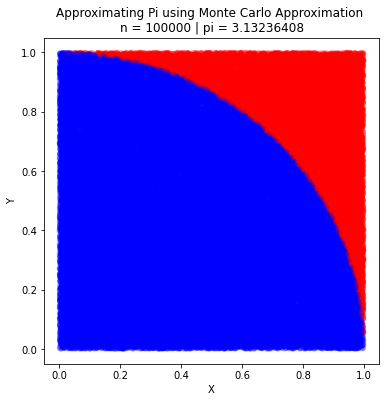

In [21]:
sample_size = int(1e5)

temp = (
    pd.DataFrame(
        data = list(zip(
            np.arange(sample_size),
            np.random.random_sample(sample_size),
            np.random.random_sample(sample_size)
        )),
        columns = ['sample', 'x', 'y']
    )
    .assign(
        mc_values =  lambda x: np.sqrt(np.square(x['x']) + np.square(x['y'])),
        color = lambda x: x['mc_values'].map(ConditionallyColor)
    )
)

(
    temp
    .plot(
        x = 'x',
        y = 'y',
        alpha = 0.2,
        kind = 'scatter',
        color = temp['color'],
        xlabel = "X",
        ylabel = "Y",
        title = f"Approximating Pi using Monte Carlo Approximation \nn = {sample_size} | pi = {pi_approximation}",
        figsize = (6,6)        
    )
    
)